# Robot Sensors

A robot senses the world through cameras and other sensors, but these sensors are not perfectly accurate. In the video, you saw an example of a robot in a 1D world made of colored grid cells; all cells were either green or red. The robot then sensed that it was in a red grid cell. 

The probability that this reading was accurate, which we'll call the prbability that the sensor has hit its target, `pHit`, was `0.6` and the probability that this reading was inaccurate (the sensor has missed its target) and the robot was *actually* in a green cell was `pMiss` equal to `0.2`.

In this notebook, let's go through how this works step by step.

### Uniform Distribution

The robot starts with a map with a length of 5 cells. Since the robot does not know where it is at first, the probability of being in any space is the same; a uniform distribution!


In [1]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ex. initialize_robot(5) = [0.2, 0.2, 0.2, 0.2, 0.2]
def initialize_robot(grid_length):
    ''' Takes in a grid length and returns 
       a uniform distribution of location probabilities'''
    
    p = []
    
    # create a list that has the value of 1/grid_length for each cell
    for i in range(grid_length):
        p.append(1.0/grid_length)
        
    return p

I'll also include a helper function for visualizing this distribution. The below function, `display_map` will output a bar chart showing the probability that a robot is in each grid space. The y-axis has a range of 0 to 1 for the range of probabilities. For a uniform distribution, this will look like a flat line. You can choose the width of each bar to be <= 1 should you want to space these out. 

In [3]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')


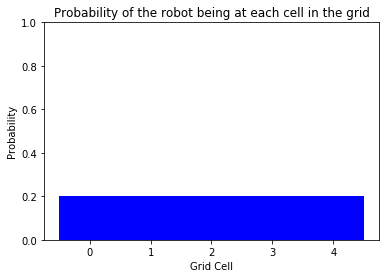

In [4]:
# initialize a 5 cell, 1D world
p = initialize_robot(5)
display_map(p)

### Probability After Sense

Then the robot senses that it is in a red cell, and updates its probabilities. As per our example:

* The probability that it is sensing the correct color is `pHit = 0.6`.
* The probability that it is sensing the incorrect color (in this case: seeing red but *actually* in a green cell) is `pMiss = 0.2`

<img src='images/robot_sensing.png' width=50% height=50% />

#### Next, we write code that outputs a new grid, `p`, after multiplying each entry by pHit or pMiss at the appropriate places. 

Remember that the red cells (cell 1 and 2) are "hits" and the other green cells are "misses."

Note that you may see values that are not exact due to how machines imperfectly represent floating points.

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


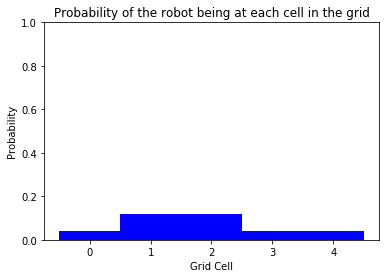

In [5]:
# given initial variables
p = initialize_robot(5)
pHit  = 0.6
pMiss = 0.2

# Creates a new grid, with modified probabilities, after sensing
# All values are calculated by a product of 1. the sensing probability for a color (pHit for red)
# and 2. the current probability of a robot being in that location p[i]; all equal to 0.2 at first.
p[0] = p[0]*pMiss
p[1] = p[1]*pHit
p[2] = p[2]*pHit
p[3] = p[3]*pMiss
p[4] = p[4]*pMiss

print(p)
display_map(p)

You should see that the red grid cells (1 and 2) have a higher probability than the green cells. One thing that may look strange is how low these probability bars are, and you may have noticed that these don't accurately represent a probability distribution because the components of this list do not add up to 1!

### QUIZ: Compute the sum of all of these probabilities.

What do these values add up to and how do you think we can turn this into a probability distribution whose components do add up to 1? 

In the next code cell, write code to sum up the values in the new world, `p`.

In [6]:
# What is the sum of all the values in p?

## TODO: add up all the values in the list of location probabilities to determine the answer
def summation(value):
    s = 0
    for i in value:
        s+=(i)
    return s

In [7]:
summation(p)

0.3600000000000001